<a href="https://colab.research.google.com/github/immortalRegis/Data-Analysis/blob/main/Parcel_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

 The dataset used in this analysis contains the parcel and route details for over 5000 parcels handled by a fictional last-mile delivery services company. Analysis will be run using python to discover some interesting trends in the dataset. 

In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/content/pmd.csv')

# Store the contents of the uploaded csv file in a dataframe called data

In [5]:
data.head()

,TrackingNum,Vendor Name,District,Route,AssignedCourier,MasterCity,MasterPostalCode,LatestEventStatus,SignatureRequired,Weight(Lbs),Length(ft),Width(ft),Height(ft),Volume(ft),Head-Contractor,Director
0,MKS6271215345,Venus Logistics,M08,NIA20-L3M,Katniss Everdeen,GRIMSBY,L3M 0B9,Assigned to Delivery Load,False,0.374785,0.0,0.0,1.0,0.084543,Mickey Mouse,Princess Leia
1,NLA2139524342,Jupiter Shipping,M05,COR171-K6A,Don Draper,HAWKESBURY,K6A 2R2,Returning to Seller,False,NaN,NaN,NaN,NaN,NaN,Bugs Bunny,Luke Skywalker
2,NLA2139451369,Jupiter Shipping,M05,COR171-K0B,Don Draper,VANKLEEK HILL,K0B 1R0,Assigned to Delivery Load,False,NaN,NaN,NaN,NaN,NaN,Bugs Bunny,Luke Skywalker
3,NLA2139730118,Jupiter Shipping,M05,MUS04-P0A,Optimus Prime,SOUTH RIVER,P0A 1X0,Assigned to Delivery Load,False,3.439211,1.0,1.0,1.0,0.576350,James Bond,Luke Skywalker
4,NLA2139746462,Jupiter Shipping,M05,RNF08-K0J,Hercule Poirot,PALMER RAPIDS,K0J 2E0,Assigned to Delivery Load,False,NaN,NaN,NaN,NaN,NaN,Bugs Bunny,Luke Skywalker


## The data has been cleaned but we check for null values

In [6]:
data.isna().sum()

TrackingNum           0
Vendor Name           0
District              0
Route                 0
AssignedCourier       0
MasterCity            0
MasterPostalCode      0
LatestEventStatus     0
SignatureRequired     0
Weight(Lbs)          25
Length(ft)           25
Width(ft)            25
Height(ft)           25
Volume(ft)           25
Head-Contractor       0
Director              0
dtype: int64

## Replace all null values with a default value of 1

In [7]:
default_value = 1
data['Weight(Lbs)'].replace(np.nan, default_value, inplace=True)
data['Length(ft)'].replace(np.nan, default_value, inplace=True)
data['Width(ft)'].replace(np.nan, default_value, inplace=True)
data['Height(ft)'].replace(np.nan, default_value, inplace=True)
data['Volume(ft)'].replace(np.nan, default_value, inplace=True)

## Run come exploratory analysis on the data

In [8]:
data.describe()

,Weight(Lbs),Length(ft),Width(ft),Height(ft),Volume(ft)
count,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000
mean,4.393259,0.647718,0.471407,0.210589,0.298061
std,7.128985,0.703577,0.539422,0.440187,0.638242
min,0.030000,0.000000,0.000000,0.000000,0.000035
25%,0.730000,0.000000,0.000000,0.000000,0.006667
50%,1.680000,1.000000,0.000000,0.000000,0.040107
75%,4.390000,1.000000,1.000000,0.000000,0.271613
max,70.547840,5.000000,3.000000,4.000000,15.266915


In [9]:
data.columns

Index(['TrackingNum', 'Vendor Name', 'District', 'Route', 'AssignedCourier',
       'MasterCity', 'MasterPostalCode', 'LatestEventStatus',
       'SignatureRequired', 'Weight(Lbs)', 'Length(ft)', 'Width(ft)',
       'Height(ft)', 'Volume(ft)', 'Head-Contractor', 'Director'],
      dtype='object')

# Visualization of Important Metrics in the Dataset

In [10]:
data['Vendor Name'].value_counts()

Mercury Logistics    3332
Jupiter Shipping     1887
Mars Logistics        425
Venus Logistics       184
Saturn Shipping        65
Name: Vendor Name, dtype: int64

<Axes: title={'center': 'Parcel Distribution by Vendor'}>

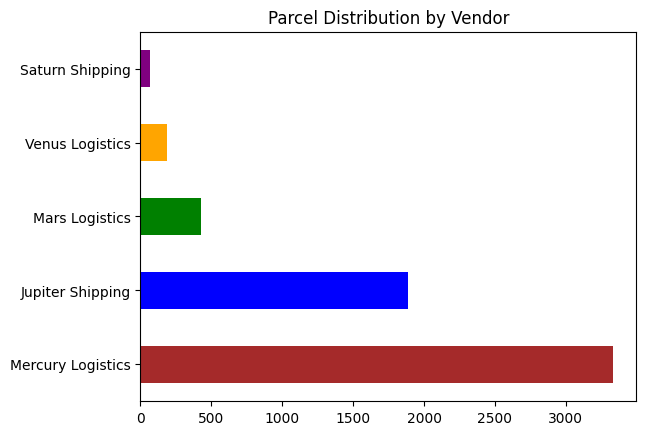

In [11]:
data['Vendor Name'].value_counts().plot(kind = 'barh', title = 'Parcel Distribution by Vendor', color = ['brown', 'blue', 'green', 'orange', 'purple' ])

The chart above shows that Mercury Logistics is the firm's biggest vendor supplying 3332 of the parcels captured in the dataset.

In [12]:
data['District'].value_counts()

M05    2263
M01    1004
M07     691
M08     679
M02     447
M03     446
M04     243
M09      66
M10      54
Name: District, dtype: int64

<Axes: title={'center': 'Parcel Distribution by District'}, ylabel='District'>

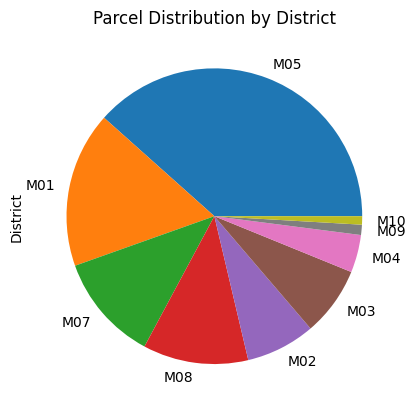

In [13]:
data['District'].value_counts().plot(kind = 'pie', title = 'Parcel Distribution by District')

Majority of the parcels in this dataset are to be delivered to 4 districts: M01, M05, M07, and M08. Districts M09 and M10 have the least volume of parcels.

In [15]:
data['Route'].value_counts().head(20)

COR171-K6A    157
MUS04-P0A     151
COR161-K0B    130
MUS03-P0A     111
RNF02-K0J     107
COR171-K0B     96
RNF01-K0J      95
SMT111-K7A     95
MUS40-P1H      85
SMT122-K7H     85
MIL01-L9T      81
SIM951-L4N     81
MUS10-P1L      81
RNF07-K0J      81
MUS60-P2A      75
MUS02-P0A      73
RNF50-K7S      69
RNF40-K7V      68
DUR916-L1C     64
NEW11-L4P      63
Name: Route, dtype: int64

<Axes: title={'center': 'Top 20 Routes by Parcel Volume'}>

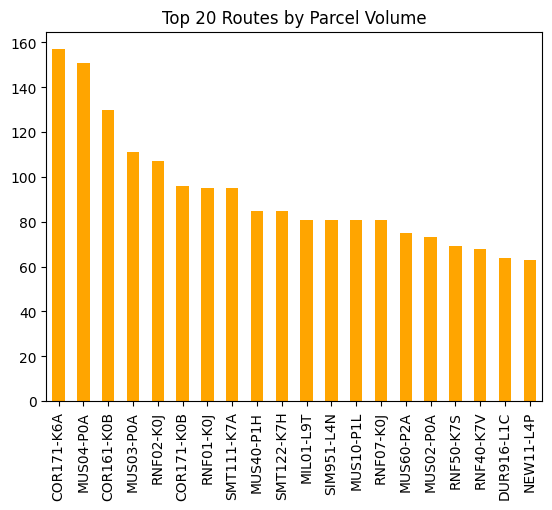

In [16]:
data['Route'].value_counts().head(20).plot(kind = 'bar', title = 'Top 20 Routes by Parcel Volume',color = 'orange')

The number of routes displayed has been limited to just the top 20 because including all the routes would have made the visualizations difficult to understand.